### forestfires Problem

classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,LeaveOneOut,KFold,train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
print('No. of duplicated rows ',df.duplicated().sum(),'\n \n No. of NA values \n',df.isna().sum().sum())

No. of duplicated rows  8 
 
 No. of NA values 
 0


In [5]:
#Removing the duplicated rows\
print('No. of Duplicated Rows before dropping',df.duplicated().sum(),'\n Size of Dataframe ', df.shape)
df = df.drop_duplicates().reset_index(drop=True)
print('No. of Duplicated Rows after dropping duplicate',df.duplicated().sum(),'\n Size of Dataframe ', df.shape)

No. of Duplicated Rows before dropping 8 
 Size of Dataframe  (517, 31)
No. of Duplicated Rows after dropping duplicate 0 
 Size of Dataframe  (509, 31)


In [6]:
df1 = df.iloc[:,2:10]# we are not considering area because from that column only size_category is derived i.e based on areasize size category is classified
df2 = df.iloc[:,11:]
df_new = pd.concat([df1,df2],axis=1,join='inner')
df_new.size_category.value_counts()
df_new.describe().T#Transpose format Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.6,92.9,96.2
DMC,509.0,110.235756,63.804112,1.1,62.3,108.3,141.3,291.3
DC,509.0,547.787623,248.196222,7.9,437.7,664.2,713.9,860.6
ISI,509.0,9.023576,4.585083,0.0,6.4,8.4,11.0,56.1
temp,509.0,18.865422,5.841083,2.2,15.4,19.3,22.8,33.3
RH,509.0,44.253438,16.365192,15.0,32.0,42.0,53.0,100.0
wind,509.0,4.011395,1.800926,0.4,2.7,4.0,4.9,9.4
rain,509.0,0.020432,0.296261,0.0,0.0,0.0,0.0,6.4
dayfri,509.0,0.163065,0.369788,0.0,0.0,0.0,0.0,1.0
daymon,509.0,0.145383,0.352833,0.0,0.0,0.0,0.0,1.0


In [7]:
#Feature Selection Model Validation
x1 = df_new.iloc[:,:-1]
y1= df_new.iloc[:,-1:]
model =DecisionTreeClassifier(criterion='entropy')# as the dependent var is categorical so we can use either c5.0(entropy) or CART(gini impurities)
model.fit(x1,y1)
rfe = RFE(model)
rfe.fit(x1,y1)
print("Decession Tree Feature selection \n",model.feature_importances_)
print("Recursive Feature Selection Ranking ", rfe.ranking_,"\n Recursive Feature Selection Top Features ",rfe.support_)

Decession Tree Feature selection 
 [0.06629657 0.0936391  0.09925987 0.13674413 0.20122358 0.12993838
 0.13396439 0.         0.00774235 0.01543621 0.01835473 0.0247277
 0.00401746 0.         0.         0.         0.01331993 0.02802077
 0.         0.         0.0036088  0.00188549 0.00398043 0.00957214
 0.         0.         0.00826795]
Recursive Feature Selection Ranking  [ 1  1  1  1  1  1  1  4  1  1  1  1 13  3  6  7  1  1  8  9 10  5 14  2
 15 11 12] 
 Recursive Feature Selection Top Features  [ True  True  True  True  True  True  True False  True  True  True  True
 False False False False  True  True False False False False False False
 False False False]


In [8]:
pd.DataFrame([x1.columns,rfe.ranking_,model.feature_importances_]).T


,0,1,2
0,FFMC,1,0.0662966
1,DMC,1,0.0936391
2,DC,1,0.0992599
3,ISI,1,0.136744
4,temp,1,0.201224
5,RH,1,0.129938
6,wind,1,0.133964
7,rain,4,0
8,dayfri,1,0.00774235
9,daymon,1,0.0154362


In [9]:
df1 = df_new.iloc[:,:7]# we are not considering area because from that column only size_category is derived i.e based on areasize size category is classified
df2 = y1
new_df = pd.concat([df1,df2],axis=1,join='inner')
new_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,small


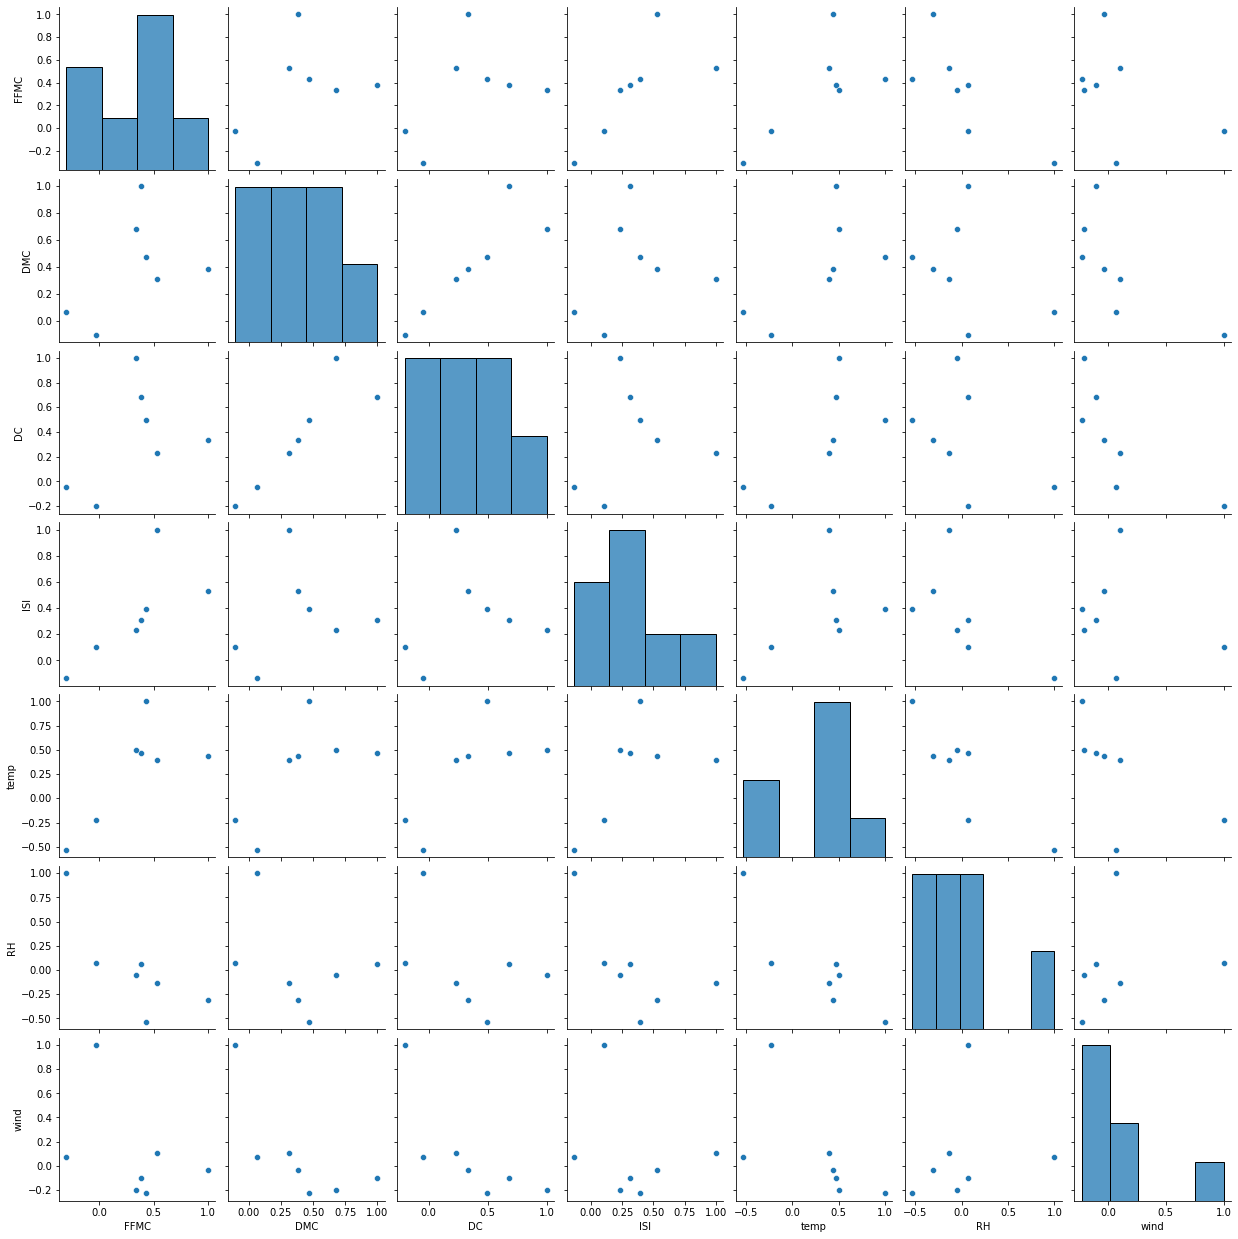

In [10]:
#Data exploration and visualizaion
#feature_sel_df = df_new.iloc[:,0:8]
cor = new_df.corr()
sns.pairplot(cor)

In [11]:
new_df.select_dtypes(include='object').value_counts()

size_category
small            371
large            138
dtype: int64

No. of numerical columns 7 



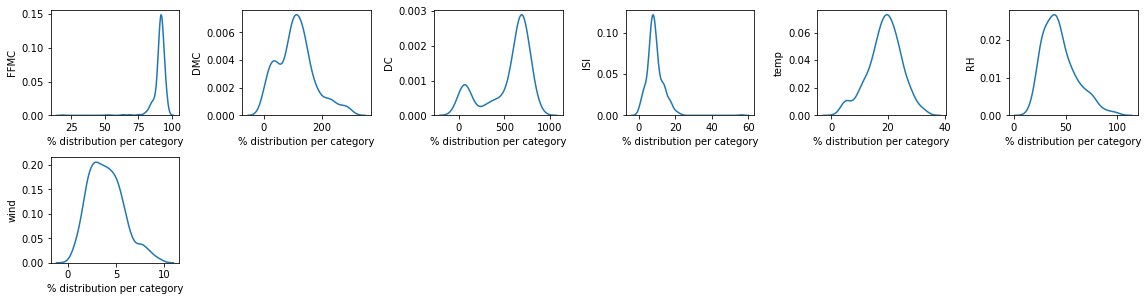

,FFMC,DMC,DC,ISI,temp,RH,wind
skewness,-6.540474,0.558596,-1.100245,2.529891,-0.321869,0.869644,0.581689
kurtosis,66.255682,0.251618,-0.242656,21.288771,0.101560,0.447242,0.043986


In [12]:
cat_columns = new_df.select_dtypes(include='object').columns.tolist()#categorical column
#num_columns = df_new.iloc[:,:8].select_dtypes(exclude='object').columns.tolist()#numerical colum
num_columns = new_df.select_dtypes(exclude='object').columns.tolist()#numerical colum
print('No. of numerical columns',len(num_columns),'\n')
plt.figure(figsize=(16,10))
for i,col in enumerate(num_columns,1):
    plt.subplot(5,6,i)
    sns.kdeplot(df_new[col])
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()
num_data = new_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

Skewness and kurtosis (high positive or negative) was observed in the following columns:FFMC,ISI

In [13]:
X=new_df.iloc[:,:-1]
Y=new_df.iloc[:,-1:]
#As the datafile is already categorized the variable 
#Transforming the data to rescaling the data using log 
#removing the scaling effect 
scalar = ss()
scaled_value = scalar.fit_transform(X.values)
scaled_df = pd.DataFrame(scaled_value)
scaled_df.head()


,0,1,2,3,4,5,6
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129


In [21]:
## Grid Search for Algorithm Tuning
#np.arange(start point,end point, step value)
import warnings
warnings.filterwarnings('ignore')
x=scaled_df.values
#param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]# kernel can be polynomial/rbf(radial base func/linear)
#param_grid = [{'kernel': ['linear'],'gamma':[100,120,110,105,50],'C':[0.16,.18,.20,.15,.14,.13,.17] }]# kernel can be polynomial/rbf(radial base func/linear)
param_grid = [{'kernel': ['rbf'],'gamma':[100,120,110,105,50],'C':[0.16,.18,.20,.15,.14,.13,.17] }]# kernel can be polynomial/rbf(radial base func/linear)
#param_grid =  [{'kernel':['rbf'],'gamma':np.arange(50, 120, 10).tolist(),'C':np.arange(0.05, 0.18, 0.01).tolist() }]# kernel can be linear/polynomial/rbf(radial base func/linear)
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, Y)
print(grid.best_score_)
print(grid.best_params_)

0.7288875946418172
{'C': 0.16, 'gamma': 100, 'kernel': 'rbf'}


In [22]:
loocv = LeaveOneOut()# we use this method for model validation technique as the data record count is small
model_building = SVC(C= 0.16, gamma = 100)
model_building.fit(x , Y)
results = cross_val_score(model_building, x, Y, cv=loocv)
results.mean()

0.7288801571709234

In [23]:
print("Mean---",results.mean(),"\n Std Deviation----",results.std())
y_pred = model_building.predict(x)
print(classification_report(Y,y_pred))
acc = accuracy_score(Y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y, y_pred)

Mean--- 0.7288801571709234 
 Std Deviation---- 0.4445378202733862
              precision    recall  f1-score   support

       large       0.00      0.00      0.00       138
       small       0.73      1.00      0.84       371

    accuracy                           0.73       509
   macro avg       0.36      0.50      0.42       509
weighted avg       0.53      0.73      0.61       509

Accuracy = 72.88801571709233


array([[  0, 138],
       [  0, 371]], dtype=int64)